# Bike Sharing - Assignment Solution
The solution is divided into the following sections:


   ### 1. Data understanding and exploration
   - Reading data from file
   - exploring data
   - visualizing data
   ### 2. Data cleaning
   - Dropping not required columns
   - Standardizing/mapping values of categorical columns, if required
   - create derived columns, if required
   ### 3. Data preparation
   - creating dummy variables for categorical variables
   ### 4. Model building and evaluation
   - Splitting the Data into Training and Testing Sets
   - Rescaling the Features
   - Building a linear model with statsmodel and check parameters
   - Dropping feature based on P-Values and VIF and update model 
   - Residual Analysis of the train data
   - Making Predictions Using the Final Model
   - Model Evaluation


In [100]:
# Import required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore') # Suppress warnings

### 1. Data Understanding and Exploration

#### 1.1. Reading Data

In [101]:
# Reading the data from file and loading in dataframe
bike = pd.read_csv("day.csv")

#### 1.2. Exploring Data

In [102]:
# viewing the first few rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
# chekcing summary of the data
print(bike.shape)
print(bike.info())
# Summary of the dataset: 730 rows, 16 columns, no null values

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [104]:
# checking basic stat of the numeric columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [105]:
## Finding the unncessary columns
print(bike['instant'].nunique())
print(bike['dteday'].nunique())
# the instant column is a sequence number not useful for model
# the dteday column is object datatype and have all unique date values, hence not useful for model 

730
730


In [106]:
bike[bike['casual']+bike['registered']!=bike['cnt']]
# cnt = casual + registered. cnt is summation of 2 other columns
## Hence casual and registered can be dropped
##### The cnt column will be the target/dependent variable. 

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [107]:
# Check the distinct values columns
print(bike['workingday'].value_counts())
print(bike['season'].value_counts())
print(bike['yr'].value_counts())
print(bike['season'].value_counts())
print(bike['weathersit'].value_counts())
print(bike['holiday'].value_counts())
print(bike['weekday'].value_counts())

1    499
0    231
Name: workingday, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64


#### 1.3. Visualizing data

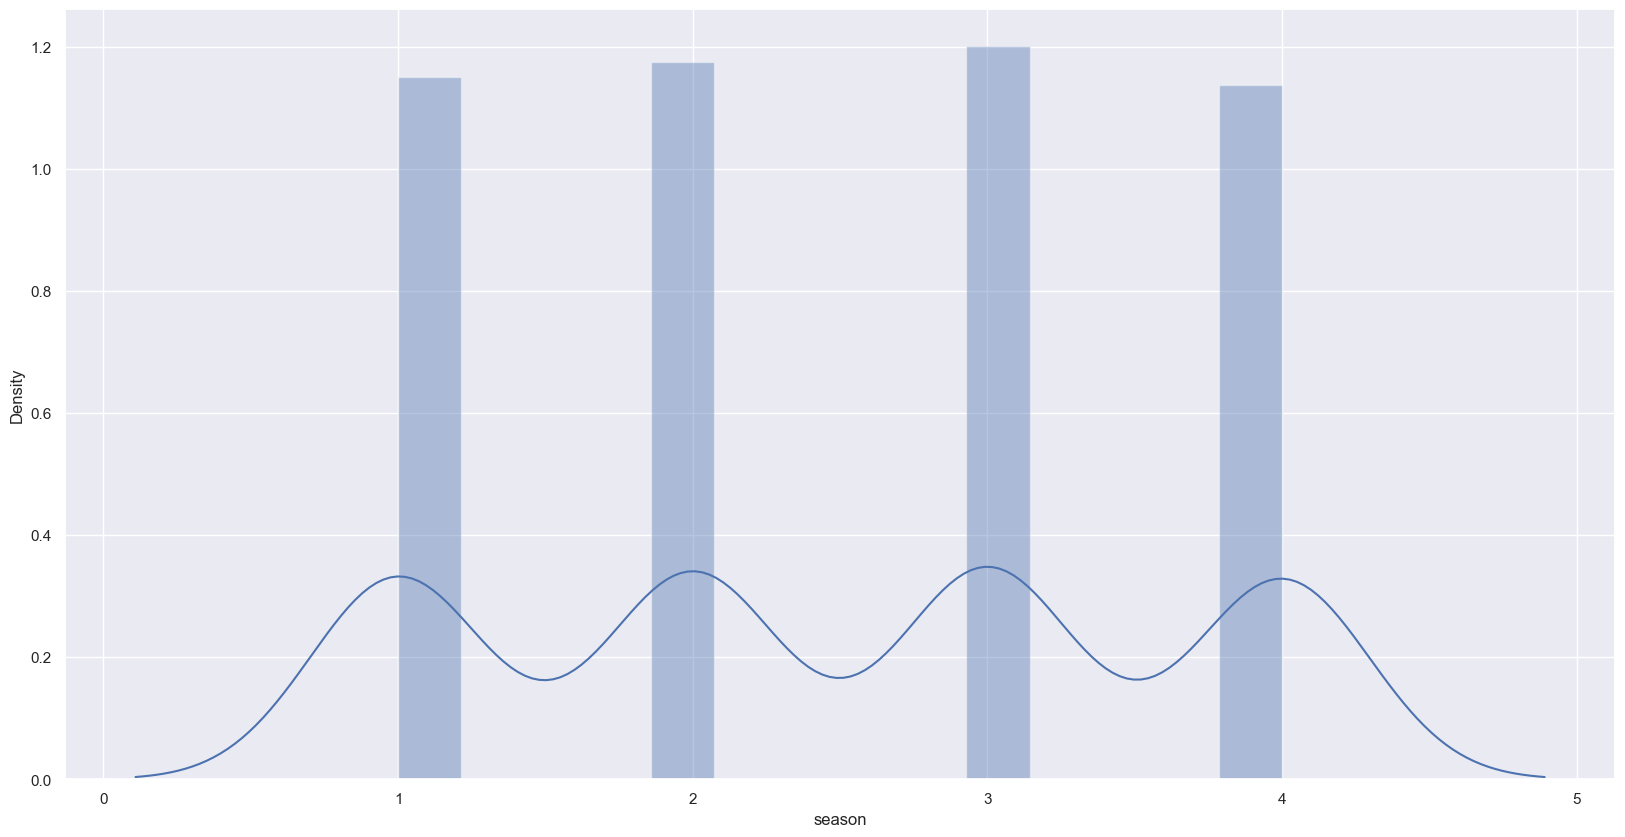

In [108]:
# Wheelbase: distance between centre of front and rarewheels
sns.distplot(bike['season'])
plt.show()

<Figure size 50000x10000 with 0 Axes>

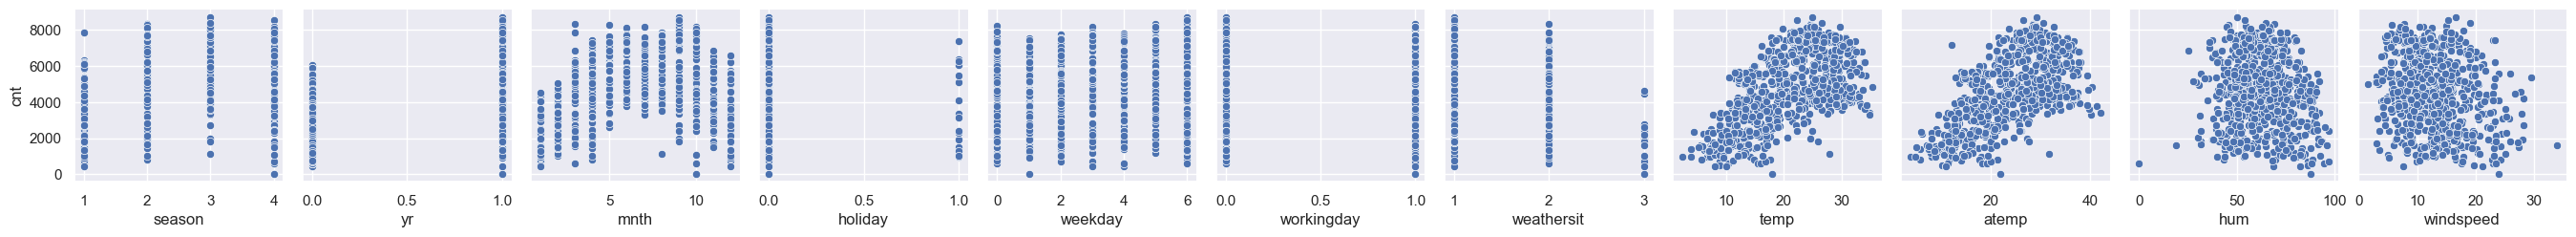

In [109]:
# Pairwise scatter plot with dependent variables vs independent variables 

plt.figure(figsize=(500, 100))
#sns.set(rc={'figure.figsize':(20,10)})
g=sns.pairplot(x_vars=['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed'] , 
             y_vars='cnt', data=bike)

plt.show()

# This is hard to read (need to zoom in), however this shows us there 7 categorical variables which are of numeric datatype
## season, weathersit, yr, mnth, holiday, weekday, workingday

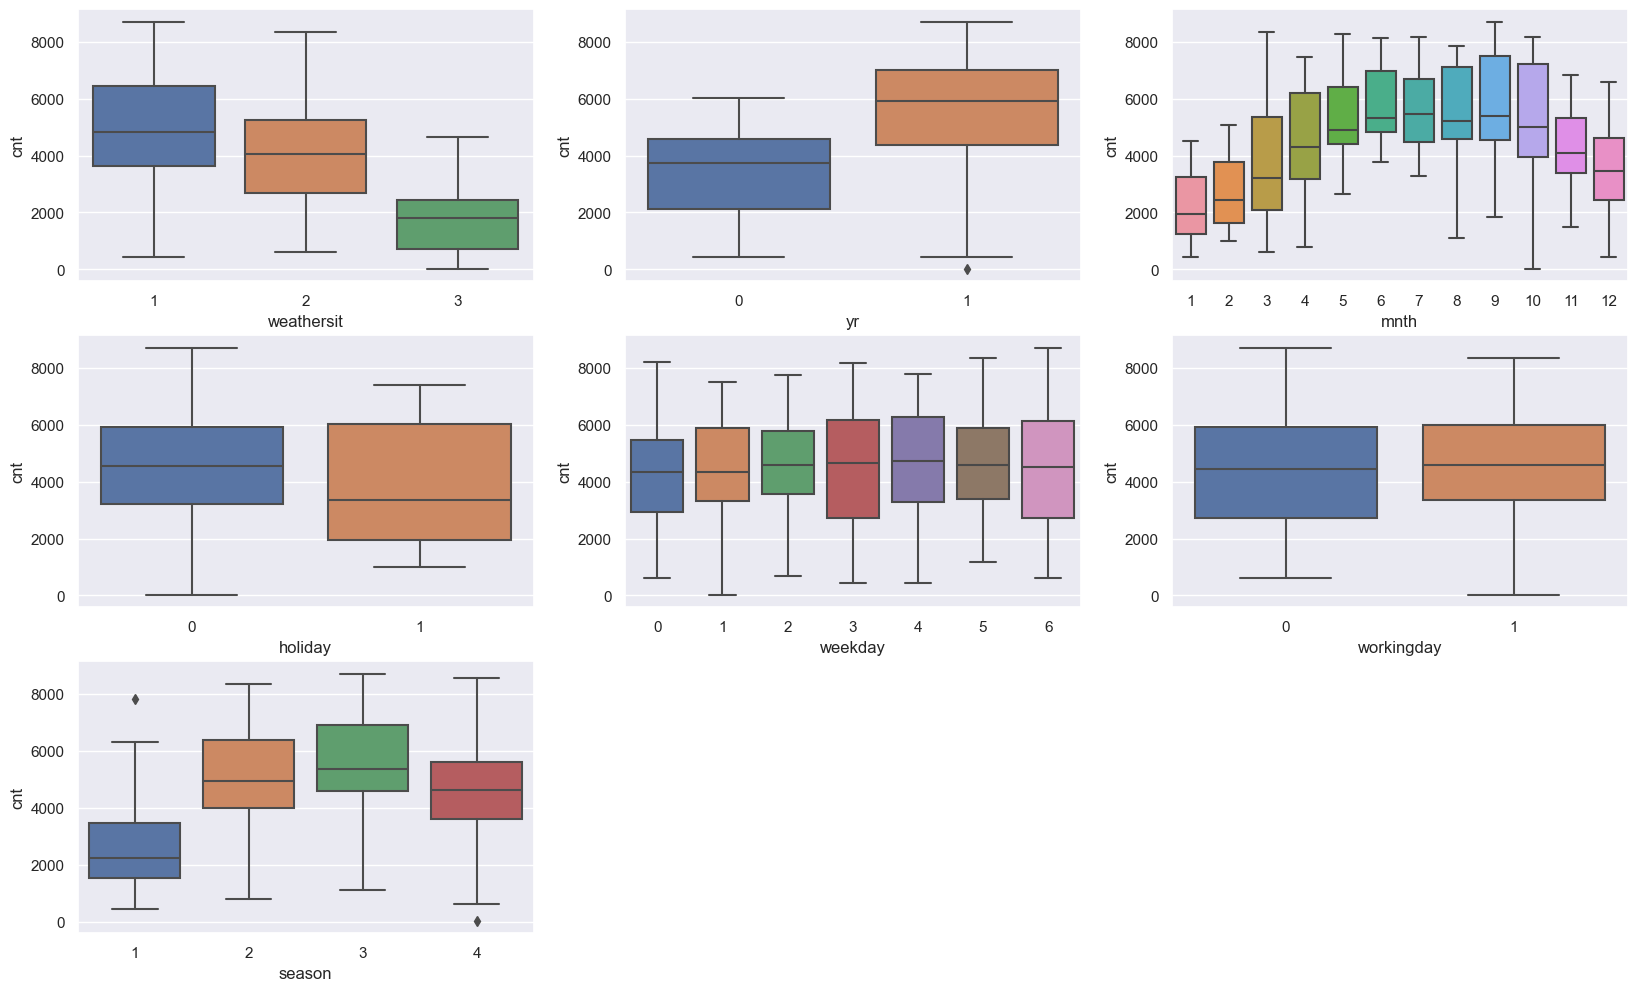

In [110]:
# Visualize the Categorical Variables in BoxPlot
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()

In [111]:
# Correlation matrix
cor = bike.corr()
cor

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


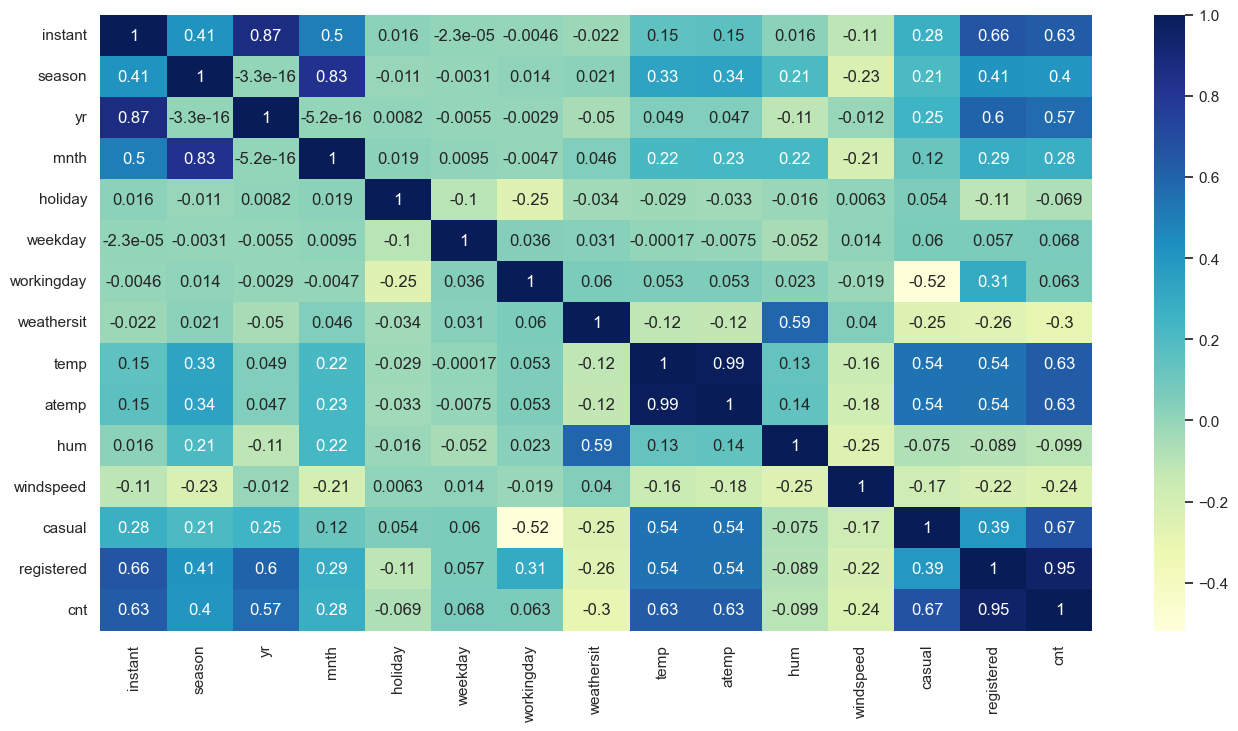

In [112]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#### Findings of Data Exploration
   - Dependent Variable => cnt
   - Categorical variables => season, weathersit, yr, mnth, holiday, weekday, workingday
   - Not required columns => 'instant','registered','casual', 'dteday'

   - Correlation of Dependent Variable(cnt) with independent variables:
    - cnt is positively corelated with season, yr, mnth, temp etc. 
    - Price is negatively correlated with holiday, humidity etc. 
   - Correlation among independent variables:
    - Many independent variables are highly correlated mnth and season etc.  
   - Thus, while building the model, we need to take care of multicollinearity.

## 2. Data Cleaning

#### 2.1. Dropping not required columns

In [113]:
# Creating "lrbike" dataframe with All numeric (float and int) variables from the dataset
lrbike = bike.select_dtypes(include=['float64', 'int64'])
lrbike.head()
# dteday was object type, hence dropped

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [114]:
# The instant, dteday, registered and casual columns can be dropped. As we have found in data exploration
lrbike.drop(['instant','registered','casual'], axis=1, inplace=True) 
lrbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### 2.2. Create derived column

In [115]:
# Create Numeric timeline column with year and month concatenated.

lrbike['timeline'] = (lrbike['yr']+1)*100+lrbike['mnth']
lrbike.timeline.value_counts()

101    31
110    31
210    31
208    31
207    31
205    31
203    31
112    31
201    31
108    31
107    31
105    31
103    31
212    31
109    30
111    30
204    30
106    30
206    30
104    30
209    30
211    30
102    28
202    28
Name: timeline, dtype: int64

#### 2.3. Standardizing/mapping values of categorical columns
Map the Values of Categorical variables from numeric to String
This will help the column names to be meaningful while creating dummy variables in data preparation step

In [116]:
# Mapping weathersit to words
    # weathersit : 
    #- 1: Clear, Few clouds, Partly cloudy, Partly cloudy ==> CLEAR WEATHER
    #- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ==> CLOUDY WEATHER
    #- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds ==> BAD WEATHER
    #- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ==> TERRIBLE WEATHER

weathermap={1: "Clear", 2: "Cloudy", 3: "Bad", 4: "Terrible"} 

lrbike['weathersit'] = lrbike['weathersit'].map(weathermap)
lrbike.weathersit.value_counts()

Clear     463
Cloudy    246
Bad        21
Name: weathersit, dtype: int64

In [117]:
# Mapping season to words
    # (1:spring, 2:summer, 3:fall, 4:winter)

seasonmap={1: "spring", 2: "summer", 3: "fall", 4: "winter"} 

lrbike['season'] = lrbike['season'].map(seasonmap)
lrbike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [118]:
# Mapping weekday to words
    # weekday : based on the date 6=Monday

daymap={6:"mon", 0:"tue", 1:"wed", 2:"thu", 3:"fri", 4:"sat", 5:"sun"} 

lrbike['weekday'] = lrbike['weekday'].map(daymap)
lrbike.weekday.value_counts()

mon    105
tue    105
wed    105
thu    104
sat    104
sun    104
fri    103
Name: weekday, dtype: int64

In [119]:
# Mapping mnth to words
    # weekday : based on the date 6=Monday

monthmap={1:"jan", 2:"feb", 3:"mar", 4:"apr", 5:"may", 6:"jun", 7:"jul", 8:"aug", 9:"sep", 10:"oct", 11:"nov", 12:"dec"} 

lrbike['mnth'] = lrbike['mnth'].map(monthmap)
lrbike.mnth.value_counts()

jan    62
mar    62
may    62
jul    62
aug    62
oct    62
dec    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

## 3. Data Preparation 


#### 3.1. creating dummy variables for categorical variables

In [120]:
lrbike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  timeline    730 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 74.3+ KB


In [121]:
lrbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,timeline
0,spring,0,jan,0,mon,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,101
1,spring,0,jan,0,tue,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,101
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,101
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,101
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,101


In [122]:
# Subset all categorical variables
columns_categotical=['season','yr','mnth','holiday','weekday','workingday','weathersit']
categorical_lrbike = lrbike[columns_categotical]
categorical_lrbike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,jan,0,mon,0,Cloudy
1,spring,0,jan,0,tue,0,Cloudy
2,spring,0,jan,0,wed,1,Clear
3,spring,0,jan,0,thu,1,Clear
4,spring,0,jan,0,fri,1,Clear


In [123]:
# Convert into dummies
dummies_lrbikes = pd.get_dummies(categorical_lrbike, drop_first=True)
print(dummies_lrbikes.shape)
dummies_lrbikes.head()

(730, 25)


,yr,holiday,workingday,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Cloudy
0,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [124]:
# Drop categorical variable columns
lrbike = lrbike.drop(columns_categotical, axis=1)

In [125]:
# Concatenate dummy variables with X
lrbike = pd.concat([lrbike, dummies_lrbikes], axis=1)

In [126]:
# Let's check the first few rows
print(lrbike.info())
lrbike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               730 non-null    float64
 1   atemp              730 non-null    float64
 2   hum                730 non-null    float64
 3   windspeed          730 non-null    float64
 4   cnt                730 non-null    int64  
 5   timeline           730 non-null    int64  
 6   yr                 730 non-null    int64  
 7   holiday            730 non-null    int64  
 8   workingday         730 non-null    int64  
 9   season_spring      730 non-null    uint8  
 10  season_summer      730 non-null    uint8  
 11  season_winter      730 non-null    uint8  
 12  mnth_aug           730 non-null    uint8  
 13  mnth_dec           730 non-null    uint8  
 14  mnth_feb           730 non-null    uint8  
 15  mnth_jan           730 non-null    uint8  
 16  mnth_jul           730 non

,temp,atemp,hum,windspeed,cnt,timeline,yr,holiday,workingday,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,101,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,101,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,101,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
3,8.200000,10.60610,59.0435,10.739832,1562,101,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
4,9.305237,11.46350,43.6957,12.522300,1600,101,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0


## 4. Model Building and Evaluation

#### 4.1. Splitting the Data into Training and Testing Sets

In [127]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(lrbike, train_size = 0.7, test_size = 0.3, random_state = 100)

#### 4.2. Scaling the Features
need to scale the numerice features

In [128]:
# Import the MinMax()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()

# Create a list of the variables that you need to scale
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'timeline']

# Scale these variables using 'fit_transform'
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [129]:
# Take a look at the train dataframe now
print(df_train.shape)
print(df_test.shape)
df_train.head()

(510, 31)
(219, 31)


,temp,atemp,hum,windspeed,cnt,timeline,yr,holiday,workingday,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Cloudy
653,0.509887,0.501133,0.575354,0.300794,0.864243,0.981982,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0.954955,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,0.918919,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
728,0.245101,0.200348,0.498067,0.663106,0.204096,1.000000,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0.927928,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


As expected, the variables have been appropriately scaled.

In [130]:
# Split the train dataset into X and y

y_train = df_train.pop('cnt')
X_train = df_train

In [131]:
#### Building the first model with all the features. to see the fit
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.40132173  0.05062751 -0.15181212 -0.18438787  0.11443959  0.12910886
 -0.05348668  0.03278612 -0.04858014  0.03821569  0.10538739  0.01195206
 -0.05381968 -0.03011405 -0.05947253 -0.04236963 -0.00376551  0.00231895
  0.02366009 -0.04899961  0.00150899  0.0766508   0.03761659 -0.00401705
  0.00573276 -0.01357547 -0.01691602 -0.01576919  0.25669709  0.19566688]
0.04388925581966141


#### 4.3. Features elimination with RFE

Now, we have 30 features. It is obviously not possible to manually eliminate these features. So building a model using recursive feature elimination to select features top n feature.

In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 13
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=13)             # running RFE
rfe = rfe.fit(X_train, y_train)

# Print the boolean results
print(rfe.support_)           
print(rfe.ranking_)  

[ True False  True  True  True  True  True False False  True  True False
  True False False False False False False  True False  True False False
 False False False False  True  True]
[ 1  8  1  1  1  1  1  3  5  1  1 10  1  7  6  4 15 17  9  1 18  1  2 16
 14 13 11 12  1  1]


#### 4.4. Building a linear model with statsmodel and check parameters

In [133]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe.support_]

# Subsetting training data for 13 selected columns
X_train_1 = X_train[col1]

# Add a constant to the model
X_train_1 = sm.add_constant(X_train_1)
print(X_train_1.shape)
X_train_1.head()

(510, 14)


,const,temp,hum,windspeed,timeline,yr,holiday,season_summer,season_winter,mnth_dec,mnth_nov,mnth_sep,weathersit_Clear,weathersit_Cloudy
653,1.0,0.509887,0.575354,0.300794,0.981982,1,0,0,1,0,0,0,1,0
576,1.0,0.815169,0.725633,0.264686,0.954955,1,0,0,0,0,0,0,1,0
426,1.0,0.442393,0.640189,0.255342,0.918919,1,0,0,0,0,0,0,0,1
728,1.0,0.245101,0.498067,0.663106,1.000000,1,0,0,0,1,0,0,1,0
482,1.0,0.395666,0.504508,0.188475,0.927928,1,0,1,0,0,0,0,0,1


#### 4.5. Do manual iterations for Dropping features based on P-Values and VIF and update model 

#### Iteration # 1

In [134]:
# Fitting the model with 13 variables
print(X_train_1.shape)
lm1 = sm.OLS(y_train, X_train_1).fit()   
print(lm1.summary())

(510, 14)
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          6.03e-189
Time:                        12:34:39   Log-Likelihood:                 508.59
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0118

In [135]:
### All the p-values above looks good. 
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [136]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,timeline,1669.67
5,yr,1658.29
0,const,114.46
12,weathersit_Clear,10.24
13,weathersit_Cloudy,8.87
8,season_winter,3.88
1,temp,3.59
9,mnth_dec,3.34
10,mnth_nov,2.30
2,hum,1.87


#### Observation # 1
The model seems to be doing a good job. Let's also quickly take a look at the VIF values. 
The variables "timeline" and "yr" have very high VIF. Lets drop those in iteration to see how Model performs

#### Iteration # 2

In [137]:
# Dropping "tieline" -- the derived column
X_train_2=X_train_1.drop(['timeline'], axis=1)
print(X_train_2.shape)
# Fitting the model with 12 variables
lm2 = sm.OLS(y_train, X_train_2).fit()   
print(lm2.summary())

(510, 13)
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          5.91e-188
Time:                        12:34:39   Log-Likelihood:                 503.44
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     497   BIC:                            -925.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0090

In [138]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.41
11,weathersit_Clear,10.17
12,weathersit_Cloudy,8.83
7,season_winter,1.92
2,hum,1.87
9,mnth_nov,1.66
8,mnth_dec,1.37
1,temp,1.36
6,season_summer,1.20
3,windspeed,1.18


#### Observation # 2
The model seems accuracy (adjusted R-Square) hasn't dropped, so it looks good. However, the p-value of "mnth_nov", "mnth_dec" has incresed, hence it is becoming insignificant, need to try dropping it. 

#### Iteration # 3

In [139]:
# Dropping "mnth_nov"
X_train_3=X_train_2.drop(['mnth_nov'], axis=1)
print(X_train_3.shape)
# Fitting the model with 10 variables
lm3 = sm.OLS(y_train, X_train_3).fit()   
print(lm3.summary())

(510, 12)
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     234.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          9.57e-189
Time:                        12:34:39   Log-Likelihood:                 502.49
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     498   BIC:                            -930.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0107

#### Observation # 3
The model seems accuracy (adjusted R-Square) hasn't dropped. but the "month_dec" looks insignificant. Need to try dropping it in next iteration. 

#### Iteration # 4

In [140]:
# Dropping "mnth_dec"
X_train_4=X_train_3.drop(['mnth_dec'], axis=1)
print(X_train_4.shape)
# Fitting the model with 10 variables
lm4 = sm.OLS(y_train, X_train_4).fit()   
print(lm4.summary())

(510, 11)
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     257.6
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          7.80e-190
Time:                        12:34:39   Log-Likelihood:                 502.18
No. Observations:                 510   AIC:                            -982.4
Df Residuals:                     499   BIC:                            -935.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0110

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.31
9,weathersit_Clear,10.10
10,weathersit_Cloudy,8.79
2,hum,1.86
1,temp,1.27
7,season_winter,1.25
6,season_summer,1.19
3,windspeed,1.18
8,mnth_sep,1.11
4,yr,1.03


#### Observation # 4
The model seems accuracy (adjusted R-Square) hasn't dropped, All the variables are significant. So the model looks good. However, VIF of "weathersit_Clear" and "weathersit_Cloudy" need to try dropping it in iteration. 

#### Iteration # 5

In [142]:
# Dropping "weathersit_Clear"
X_train_5=X_train_4.drop(['weathersit_Clear'], axis=1)
print(X_train_5.shape)
# Fitting the model with 9 variables
lm5 = sm.OLS(y_train, X_train_5).fit()   
print(lm5.summary())

(510, 10)
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     239.9
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          3.96e-175
Time:                        12:34:39   Log-Likelihood:                 464.62
No. Observations:                 510   AIC:                            -909.2
Df Residuals:                     500   BIC:                            -866.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2972

In [143]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.03
2,hum,1.58
9,weathersit_Cloudy,1.39
1,temp,1.26
7,season_winter,1.25
6,season_summer,1.19
3,windspeed,1.13
8,mnth_sep,1.11
4,yr,1.03
5,holiday,1.01


#### Observation # 5
The model seems accuracy (adjusted R-Square) hasn't dropped significantly. 
All the variables are significant i.e. p-value < 0.05. 
However, "weathersit_Cloudy" = 0.047 i.e. is close to 0.05. 
All the VIF are < 5.  
So the model looks good with this 9 Variables. However, trying one more iteration with droppping "weathersit_Cloudy"  


#### Iteration # 6

In [144]:
# Dropping "weathersit_Cloudy"
X_train_6=X_train_5.drop(['weathersit_Cloudy'], axis=1)
print(X_train_6.shape)
# Fitting the model with 8 variables
lm6 = sm.OLS(y_train, X_train_6).fit()   
print(lm6.summary())

(510, 9)
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.68e-175
Time:                        12:34:39   Log-Likelihood:                 462.60
No. Observations:                 510   AIC:                            -907.2
Df Residuals:                     501   BIC:                            -869.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3114      0.027  

In [145]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,38.35
7,season_winter,1.24
1,temp,1.20
6,season_summer,1.19
2,hum,1.16
3,windspeed,1.13
8,mnth_sep,1.11
4,yr,1.02
5,holiday,1.01


#### Observation # 6
The model seems accuracy (adjusted R-Square) hasn't dropped significantly. 
All the variables are significant i.e. p-value < 0.05. 
All the VIF are < 5.  
So the model looks good with this 8 Variables.

#### Proceed further with this model
All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has dropped from `0.842` with **13 variables** to just `0.807` using **8 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

Proceeding to Next Steps. 

#### 4.6. Residual Analysis

In [146]:
y_train_cnt = lm6.predict(X_train_6)

Text(0.5, 0, 'Errors')

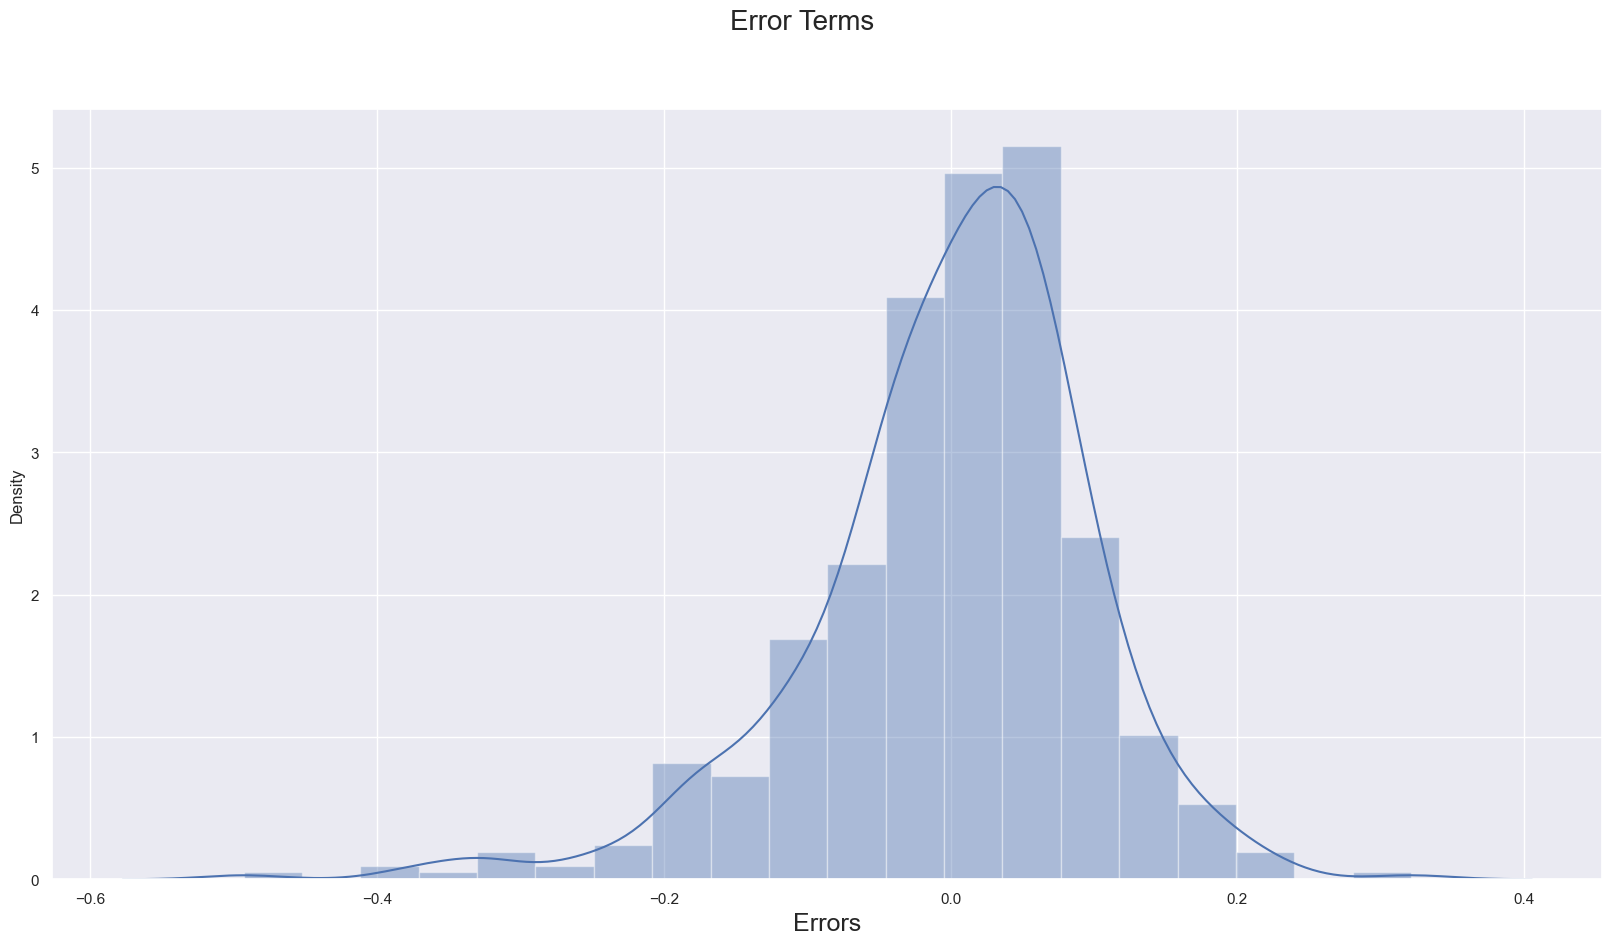

In [147]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The error terms are fairly normally distributed on Train Set. 
Hence Assumptions of LR is holding True. 
We can use this to make predictions on the test-set.

#### 4.7. Making Predictions

In [148]:
# Scaling the test set
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [149]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [150]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_train_6.columns

Index(['const', 'temp', 'hum', 'windspeed', 'yr', 'holiday', 'season_summer',
       'season_winter', 'mnth_sep'],
      dtype='object')

In [151]:
# Let's subset these columns and create a new dataframe 'X_test_rfe2'
col=['temp', 'hum', 'windspeed', 'timeline', 'holiday',
       'season_summer', 'season_winter', 'mnth_sep']
X_test_6 = X_test[col]
print(X_test_6.shape)

(219, 8)


In [152]:
# Add a constant to the test set created
X_test_6 = sm.add_constant(X_test_6)
X_test_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   temp           219 non-null    float64
 2   hum            219 non-null    float64
 3   windspeed      219 non-null    float64
 4   timeline       219 non-null    float64
 5   holiday        219 non-null    int64  
 6   season_summer  219 non-null    uint8  
 7   season_winter  219 non-null    uint8  
 8   mnth_sep       219 non-null    uint8  
dtypes: float64(5), int64(1), uint8(3)
memory usage: 12.6 KB


In [153]:
# Making predictions with the FINAL Model with 8 Variables
y_pred = lm6.predict(X_test_6)

Text(0, 0.5, 'y_pred')

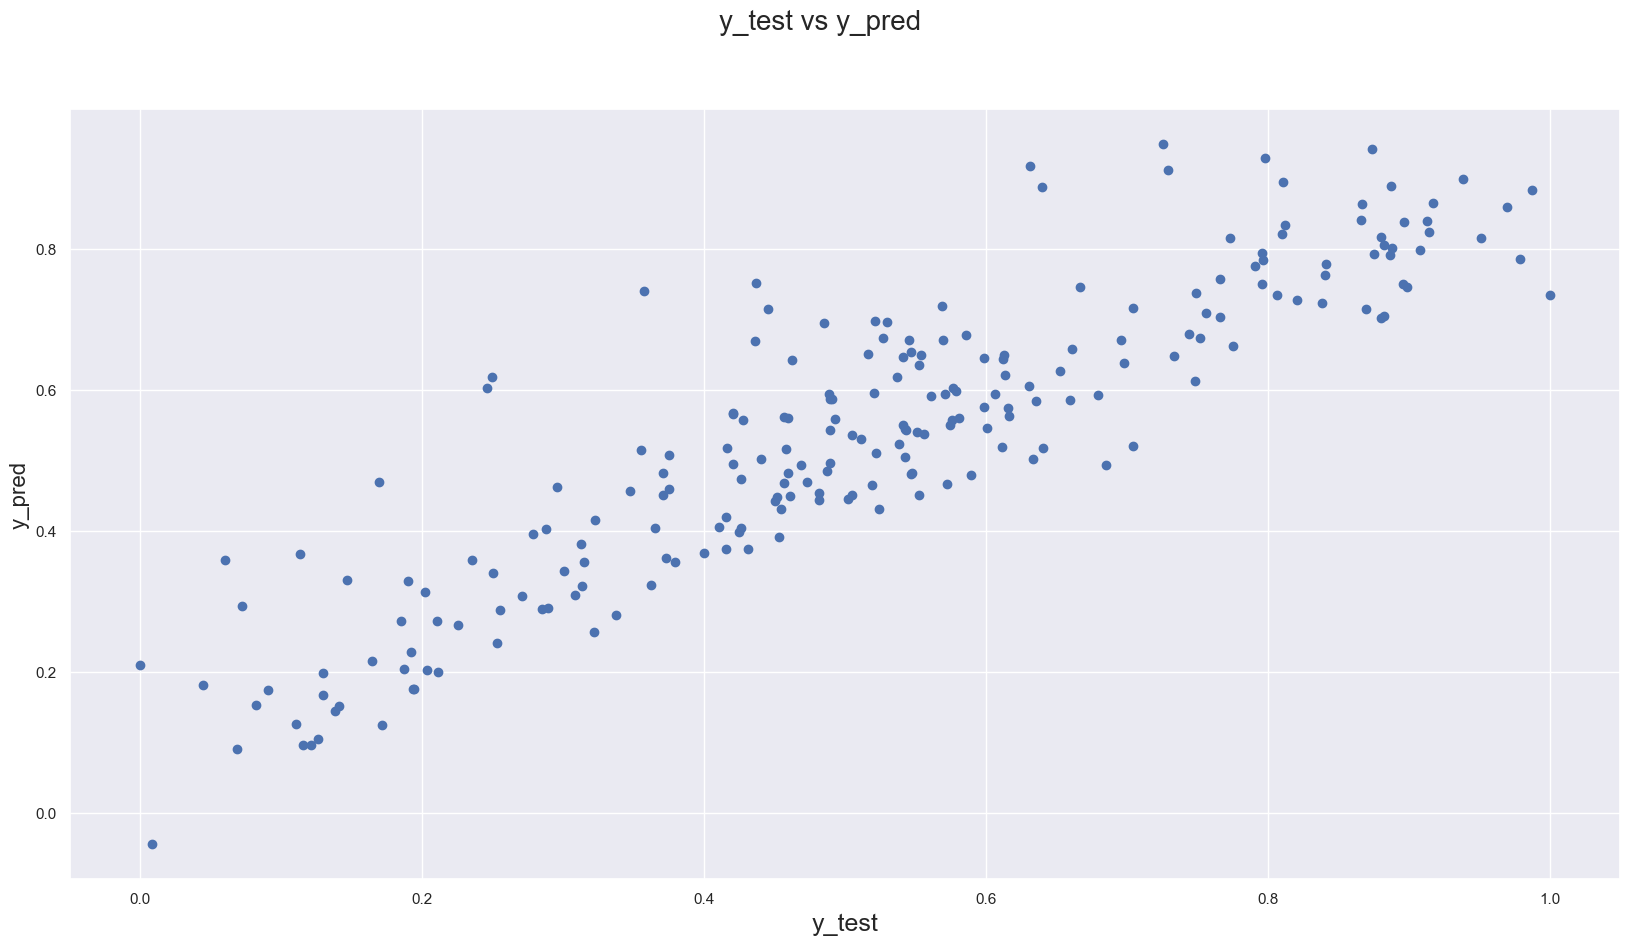

In [154]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

#### 4.8. Model Evaluation

In [155]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7867963899051555

Thus, for the model with 8 variables, the r-squared on training and test data is about 81.1% and 78.6% respectively. The adjusted r-squared on the train set is about is about 80.8%.

#### Checking the correlations between the final predictor variables

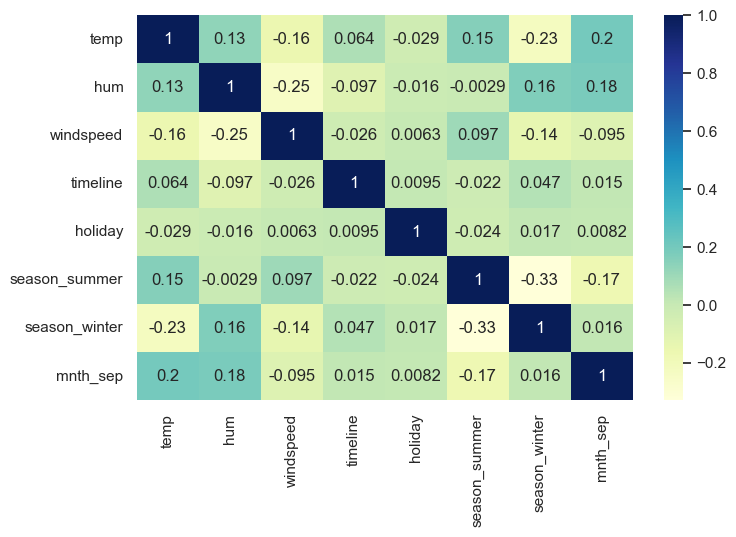

In [156]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(lrbike[col].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [157]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          1.68e-175
Time:                        12:34:41   Log-Likelihood:                 462.60
No. Observations:                 510   AIC:                            -907.2
Df Residuals:                     501   BIC:                            -869.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3114      0.027     11.524

The equation of our best fitted line is:

$cnt = 0.3114+ 0.5977  \times  temp - 0.3425  \times  hum - 0.2361 \times windspeed + 0.2291 \times yr - 0.0853 \times holiday + 0.0908 \times season_summer + 0.1398 \times season_winter + 0.1031 \times mnth_sep$
